In [83]:
# import
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [84]:
file_path = '../data/processed/Customer_Churn_Dataset_0_impute_label.csv'
df = pd.read_csv(file_path)

drop_cols = ['Unnamed: 0']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

target = 'Churn'
X = df.drop(columns=[target])
y = df[target]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    min_child_samples=20,
    is_unbalance=True,
    random_state= 0,
    force_row_wise=True
)
model.fit(X_train, y_train)

# 추론
pred_train_lgbm = model.predict(X_train)
pred_test_lgbm = model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------train set Classification Report---------------")
print(classification_report(y_train, pred_train_lgbm))

print("---------------test set Classification Report---------------")
print(classification_report(y_test, pred_test_lgbm))

[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training from score -1.017935
---------------train set Classification Report---------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3880
           1       0.81      1.00      0.89      1402

    accuracy                           0.94      5282
   macro avg       0.90      0.95      0.92      5282
weighted avg       0.95      0.94      0.94      5282

---------------test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1294
           1       0.66      0.82      0.73       467

    accuracy                           0.84      1761
   m

In [87]:
model.feature_importances_

array([ 222,  117,  165,   81, 1457,   46,  146,   87,  162,  192,  128,
        159,   62,   91,  176,  179,  405, 2126, 2013,  269,  717],
      dtype=int32)

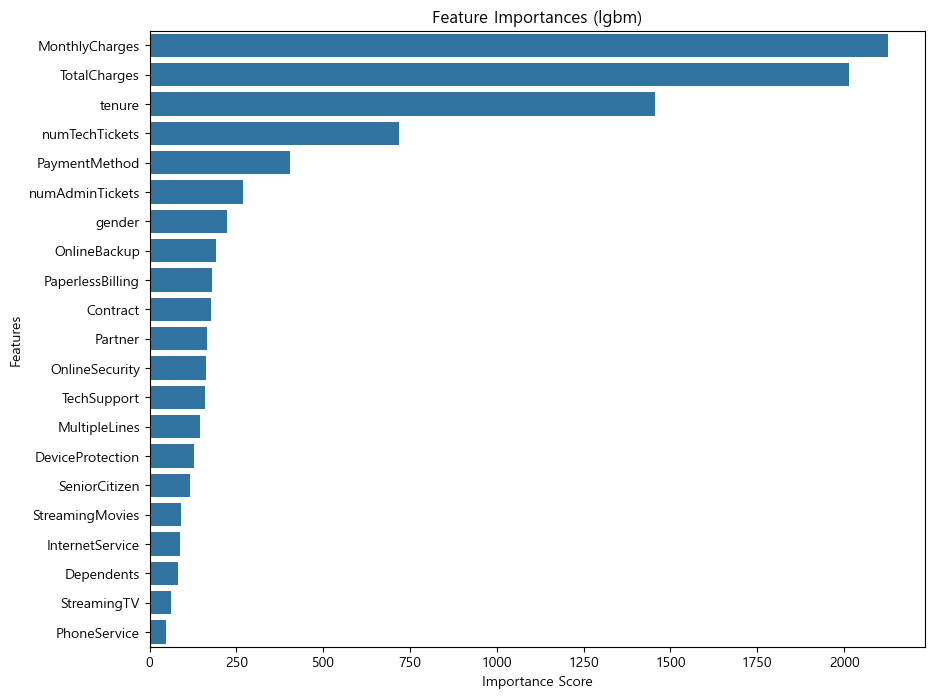

In [88]:
fi = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

importances = model.feature_importances_
feature_names = X_train.columns

# 보기 좋게 정렬하기 위해 Series로 변환
ft_series = pd.Series(importances, index=feature_names)
ft_series = ft_series.sort_values(ascending=False)  # 내림차순 정렬

# 2. 시각화 그리기
plt.figure(figsize=(10, 8))  # 그림 사이즈 조절 (가로, 세로)
plt.title("Feature Importances (lgbm)")

# seaborn을 이용해 가로 막대 그래프 그리기
sns.barplot(x=ft_series, y=ft_series.index)

# 라벨 달기
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [89]:
# Permutation Importance check

from sklearn.inspection import permutation_importance

perm = permutation_importance(
    model,
    X_test,
    y_test,
    scoring='f1',   # 꼭 f1 또는 recall 중심
    n_repeats=10,
    random_state=42
)

importances = perm.importances_mean
for col, imp in sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{col}: {imp}")

numTechTickets: 0.1723645121902297
tenure: 0.11536897257738524
Contract: 0.06299942610511536
MonthlyCharges: 0.04214184864909787
TotalCharges: 0.04089611124757303
OnlineSecurity: 0.021808582794231722
InternetService: 0.013671082789863032
PaymentMethod: 0.0077419601796756225
TechSupport: 0.002633223757077119
MultipleLines: 0.0017680682751710862
SeniorCitizen: 0.000592436663064011
StreamingTV: 0.0005147370100216153
PaperlessBilling: 0.0004398289089050822
PhoneService: 3.108909878146715e-05
Partner: -0.0002932885588926903
Dependents: -0.0003022153597228683
OnlineBackup: -0.0013983730171440167
numAdminTickets: -0.0043375049970058146
DeviceProtection: -0.0051111115322657105
gender: -0.005655792853069186
StreamingMovies: -0.00588890318494345


In [90]:
high_importance_feature = ['numTechTickets', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']
middle_importance_featrue = ['OnlineSecurity', 'InternetService', 'PaymentMethod',
 'TechSupport', 'MultipleLines']
low_importance_feature = ['SeniorCitizen', 'StreamingTV', 'PaperlessBilling', 'PhoneService',
 'Partner', 'Dependents', 'OnlineBackup', 'numAdminTickets',
 'DeviceProtection', 'gender', 'StreamingMovies']

In [ ]:
# low_importance_feature 제거 후 비교
# 기존 acc = 0.84, f1_score = 0.73, recall = 0.82
# low 제외 후 acc = 0.84, f1_score = 0.73, recall = 0.84
df_except_low = df.drop(columns= low_importance_feature)

target = 'Churn'
X = df_except_low.drop(columns=[target])
y = df_except_low[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    min_child_samples=20,
    is_unbalance=True,
    random_state= 0,
    force_row_wise=True
)
model.fit(X_train, y_train)

# 추론
pred_train_lgbm = model.predict(X_train)
pred_test_lgbm = model.predict(X_test)

print("---------------train set Classification Report---------------")
print(classification_report(y_train, pred_train_lgbm))

print("---------------test set Classification Report---------------")
print(classification_report(y_test, pred_test_lgbm))

[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training from score -1.017935
---------------train set Classification Report---------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      3880
           1       0.78      0.99      0.87      1402

    accuracy                           0.92      5282
   macro avg       0.89      0.94      0.91      5282
weighted avg       0.94      0.92      0.92      5282

---------------test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1294
           1       0.65      0.84      0.73       467

    accuracy                           0.84      1761
   m

In [ ]:
# middle_importance_feature 제거 후 비교
# 기존 acc = 0.84, f1_score = 0.73, recall = 0.82
# low 제외 후 acc = 0.84, f1_score = 0.73, recall = 0.84
# middle 제외 후 acc = 0.89, f1_score = 0.72, recall = 0.85
df_middle_low = df_except_low.drop(columns= middle_importance_featrue)

target = 'Churn'
X = df_middle_low.drop(columns=[target])
y = df_middle_low[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    min_child_samples=20,
    is_unbalance=True,
    random_state= 0,
    force_row_wise=True
)
model.fit(X_train, y_train)

# 추론
pred_train_lgbm = model.predict(X_train)
pred_test_lgbm = model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------train set Classification Report---------------")
print(classification_report(y_train, pred_train_lgbm))

print("---------------test set Classification Report---------------")
print(classification_report(y_test, pred_test_lgbm))

[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training from score -1.017935
---------------train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3880
           1       0.72      0.97      0.83      1402

    accuracy                           0.89      5282
   macro avg       0.85      0.92      0.87      5282
weighted avg       0.92      0.89      0.90      5282

---------------test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1294
           1       0.62      0.85      0.72       467

    accuracy                           0.82      1761
   ma

In [ ]:
# middle_importance_feature 제거 후가 더 좋다고 판단.
# 현 상태에서 튜닝 작업 시작

In [ ]:
#최종 모델 저장 
import joblib

import os
# 폴더가 없으면 만드는 안전장치
os.makedirs('../models/ML', exist_ok=True)

# 모델 저장
joblib.dump(best_model, '../models/ML/final_ml_model.pkl')